In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.12 


Number of faces detected: 1


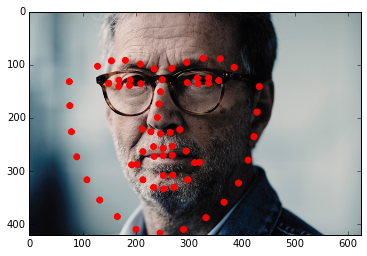

Number of faces detected: 1


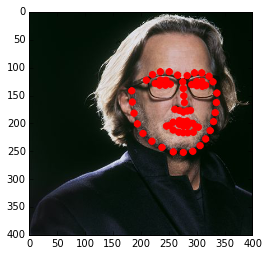

Number of faces detected: 1


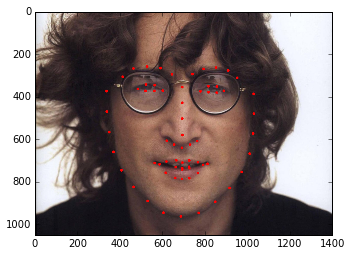

Number of faces detected: 1


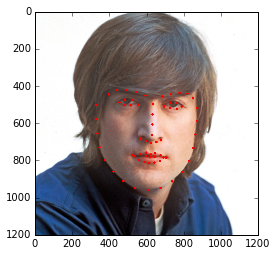

In [11]:
PATH = "clapton-1.jpg"
PATH2 = "clapton-2.jpg"
PATH3 = "lennon-1.jpg"
PATH4 = "lennon-2.jpg"


img = cv2.imread(PATH)
# r = 450.0 / img.shape[1]
# dim = (450, int(img.shape[0] * r))
# img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

img2 = cv2.imread(PATH2)
img3 = cv2.imread(PATH3)
img4 = cv2.imread(PATH4)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img_rgb3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img_rgb4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

import sys
import os
import dlib
import glob
from skimage import io

def FacialPointDetector( img, img_rgb ) :
    predictor_path = "../FaceMorphing/shape_predictor_68_face_landmarks.dat"
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(predictor_path)
    dets = detector(img, 1)
    print("Number of faces detected: {}".format(len(dets)))

    for k, d in enumerate(dets):
    #     print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
    #         k, d.left(), d.top(), d.right(), d.bottom()))
        # Get the landmarks/parts for the face in box d.
        shape = predictor(img, d)
    #     print("Part 0: {}, Part 1: {} ...".format(shape.part(0),
    #                                               shape.part(1)))
        fp = np.array([[p.x, p.y] for p in predictor(img, d).parts()])
        for i in range(0,67,1):
            cv2.circle( img_rgb, (fp[i][0], fp[i][1]), 6, (255,0,0), cv2.cv.CV_FILLED, cv2.CV_AA, 0 )
    
        return fp
    
fp = FacialPointDetector( img, img_rgb )
plt.imshow(img_rgb)
plt.show()

fp2 = FacialPointDetector( img2, img_rgb2 )
plt.imshow(img_rgb2)
plt.show()

fp3 = FacialPointDetector( img3, img_rgb3 )
plt.imshow(img_rgb3)
plt.show()

fp4 = FacialPointDetector( img4, img_rgb4 )
plt.imshow(img_rgb4)
plt.show()

Total Trangles: 136


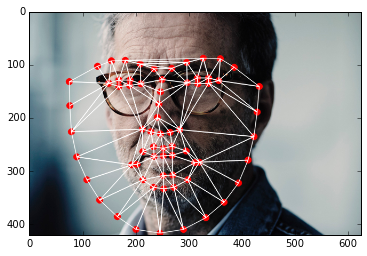

Total Trangles: 136


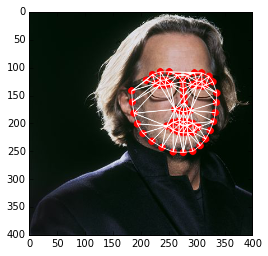

Total Trangles: 136


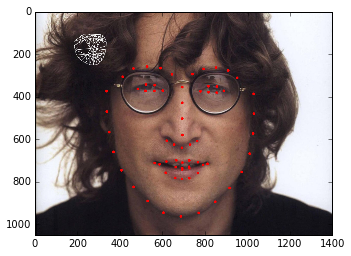

Total Trangles: 136


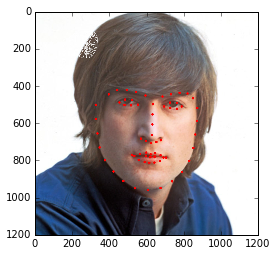

In [12]:
# Check if a point is inside a rectangle
def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True

def draw_delaunay(img, subdiv, delaunay_color ) :
 
    triangleList = subdiv.getTriangleList();
    size = img.shape
    r = (0, 0, size[1], size[0])
 
    trList = []
    for t in triangleList :
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        trList.append((pt1, pt2, pt3)) 
            
        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
            cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.CV_AA, 0)
            cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.CV_AA, 0)
            cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.CV_AA, 0)
                 
    print( "Total Trangles: {}".format(len(trList)) )            
    return trList
 
def DrawFacialTriangulation( img, img_rgb, fp ) :
    # Rectangle to be used with Subdiv2D
    size = img.shape
    rect = (0, 0, size[1], size[0])

    # Create an instance of Subdiv2D
    subdiv = cv2.Subdiv2D(rect);

    # #test
    # cv2.rectangle(img_rgb, (rect[0],rect[1]), (rect[2],rect[3]), (0, 255, 0), 10)
    # plt.imshow(img_rgb)
    # plt.show()

    # Insert points into subdiv
    for i in range(0,67,1):
        subdiv.insert((fp[i][0], fp[i][1]))

    # Draw delaunay triangles
    draw_delaunay( img_rgb, subdiv, (255, 255, 255) );

trList = DrawFacialTriangulation( img, img_rgb, fp )
plt.imshow(img_rgb)
plt.show()

trList2 = DrawFacialTriangulation( img2, img_rgb2, fp2 )
plt.imshow(img_rgb2)
plt.show()

trList3 = DrawFacialTriangulation( img3, img_rgb3, fp3 )
plt.imshow(img_rgb3)
plt.show()

trList4 = DrawFacialTriangulation( img4, img_rgb4, fp2 )
plt.imshow(img_rgb4)
plt.show()